# FreeCodeCamp - Medical Data Visualizer Project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Import data
df = pd.read_csv("C:..\medical_examination.csv")
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


#### Add an 'overweight' column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [3]:
#0 = Not overweight
#1 = Overweight - BMI >2
bmi = df['weight'] / (df['height'] / 100) ** 2
df['overweight'] = np.where(bmi > 25, 1, 0)

In [4]:
#Just Checking
df['overweight'].value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

In [5]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,1


#### Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [6]:
df['gluc'] = np.where(df['gluc'] > 1, 1, 0)
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, 0)

#### Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each 'cardio' value. The chart should look like "examples/Figure_1.png".

Draw categorical plot:

In [37]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from
    #'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=[
        'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
    #You will have to rename one of the collumns for the catplot to work correctly.
    df_cat = pd.melt(df[["cardio", "cholesterol", "gluc", "smoke", "alco", "active", "overweight"]], 
                     id_vars="cardio")
    df_cat = pd.DataFrame(df_cat.groupby(['cardio', 'variable','value'])
                          ['value'].count()).rename(columns={'value': 'total'}).reset_index()

    # Draw the catplot with 'sns.catplot()'
    graf = sns.catplot( x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')
    fig = graf.fig
    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

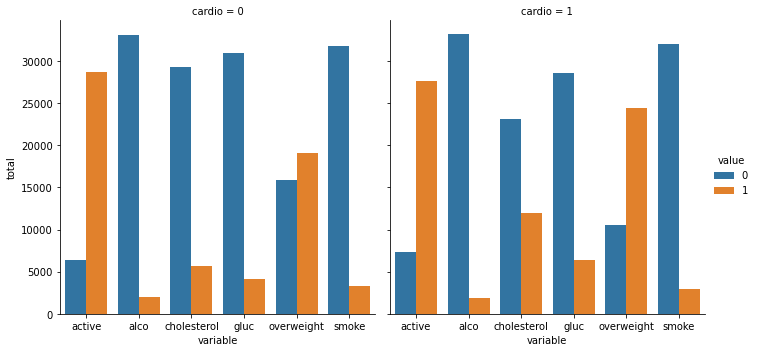

In [38]:
fig

In [45]:
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi'])
                 & (df['height'] >= df['height'].quantile(0.025))
                 & (df['height'] <= df['height'].quantile(0.975))
                 & (df['weight'] >= df['weight'].quantile(0.025))
                 & (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True


    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 12))

    # Draw the heatmap with 'sns.heatmap()'
    ax = sns.heatmap(
        corr,
        linewidths=.5,
        annot=True,
        fmt='.1f',
        mask=mask,
        square=True,
        center=0,
        vmin=-0.1,
        vmax=0.25,
        cbar_kws={
            'shrink': .45,
            'format': '%.2f'
        })


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


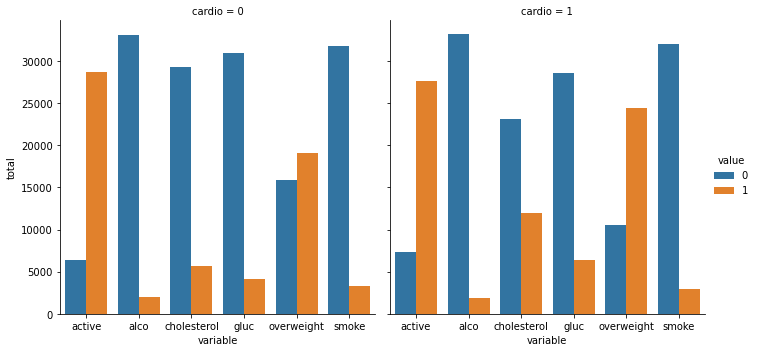

In [46]:
fig